In [1]:
import json

### Define encoding function

In [2]:
import torch

from transformers import RobertaTokenizer, RobertaModel

# Load the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

def encode_sentences(sentences):
    # Tokenize the sentences
    tokenized = tokenizer.batch_encode_plus(
        sentences,
        add_special_tokens=True,
        max_length=128,
        truncation=True,
        padding='longest',
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    # Encode the sentences with the RoBERTa model
    with torch.no_grad():
        output = model(
            input_ids=tokenized['input_ids'], 
            attention_mask=tokenized['attention_mask']
        )
    
    # Extract the embeddings from the RoBERTa model output
    embeddings = output.last_hidden_state.mean(dim=1).numpy()
    
    return embeddings

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Collect data

In [3]:
data = {
    'product': {},
    'academic': {},
    'committee': {}
}

In [4]:
domains = ["product", "academic", "committee"]
sentence_types = ["original", "gpt", "google"]


for domain in domains:
    for s_type in sentence_types:
        file_name = f"umap-sentences/sentences_{domain}_{s_type}.json"
        
        with open(file_name, 'r') as f:
            data[domain][s_type] = json.load(f)

In [14]:
#data['product']['original']
LIMIT = 500

In [15]:
original_sentences = data['committee']['original'][:LIMIT]
google_sentences = data['committee']['google'][:LIMIT]
gpt_sentences = data['committee']['gpt'][:LIMIT]

# original_sentences = data['product']['original'][:LIMIT]
# google_sentences = data['product']['google'][:LIMIT]
# gpt_sentences = data['product']['gpt'][:LIMIT]

# original_sentences = data['academic']['original'][:LIMIT]
# google_sentences = data['academic']['google'][:LIMIT]
# gpt_sentences = data['academic']['gpt'][:LIMIT]

# Google

In [16]:
FONTSIZE = 15

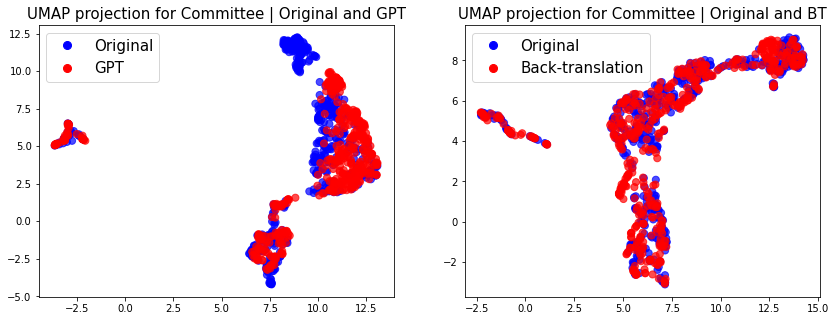

In [17]:
# import matplotlib
# Increase font size of all text elements in the figure
# matplotlib.rcParams.update({'font.size': 12})

import umap
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))



sentences = original_sentences + gpt_sentences
labels = ['Original'] * len(original_sentences) + ['GPT'] * len(google_sentences)
original_indices = [None] * len(original_sentences) + list(range(len(original_sentences)))
vectors = encode_sentences(sentences)
embedding = umap.UMAP().fit_transform(vectors)

scatter_GPT = ax1.scatter(
    embedding[:, 0], embedding[:, 1], 
    c=[('blue' if label=='Original' else 'red') for label in labels],
    s=[(50 if label=='Original' else 50) for label in labels],
    alpha=0.7
)

# Add legend
original_patch = ax1.plot([],[], marker="o", ms=8, ls="", mec=None, color='blue', label="Original")[0]
gpt_patch = ax1.plot([],[], marker="o", ms=8, ls="", mec=None, color='red', label="GPT")[0]
ax1.legend(handles=[original_patch, gpt_patch], fontsize=FONTSIZE)
ax1.set_title("UMAP projection for Committee | Original and GPT", fontsize=FONTSIZE)



# --------------------------- BT -------------------------
# --------------------------- BT -------------------------
# --------------------------- BT -------------------------

sentences = original_sentences + google_sentences
labels = ['Original'] * len(original_sentences) + ['Back-translation'] * len(google_sentences)
original_indices = [None] * len(original_sentences) + list(range(len(original_sentences)))
vectors = encode_sentences(sentences)
embedding = umap.UMAP().fit_transform(vectors)

scatter_BT = ax2.scatter(
    embedding[:, 0], embedding[:, 1], 
    c=[('blue' if label=='Original' else 'red') for label in labels],
    s=[(50 if label=='Original' else 50) for label in labels],
    alpha=0.7
)


# Add legend
original_patch = ax2.plot([],[], marker="o", ms=8, ls="", mec=None, color='blue', label="Original")[0]
gpt_patch = ax2.plot([],[], marker="o", ms=8, ls="", mec=None, color='red', label="Back-translation")[0]
ax2.legend(handles=[original_patch, gpt_patch], fontsize=FONTSIZE)
ax2.set_title("UMAP projection for Committee | Original and BT", fontsize=FONTSIZE)

plt.savefig('umap-committee.png', dpi=300, bbox_inches='tight')

#plt.show()

# Academic

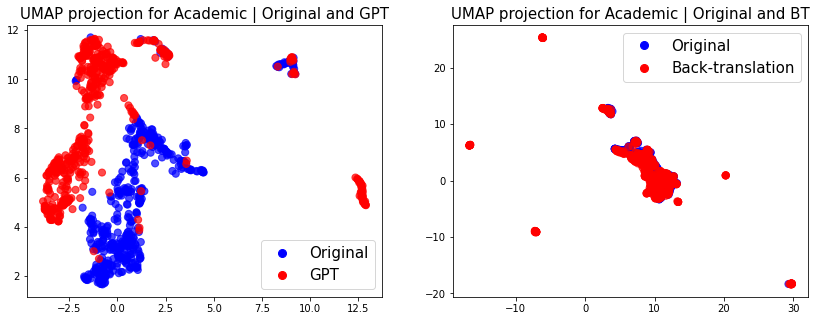

In [20]:
# original_sentences = data['committee']['original'][:LIMIT]
# google_sentences = data['committee']['google'][:LIMIT]
# gpt_sentences = data['committee']['gpt'][:LIMIT]

# original_sentences = data['product']['original'][:LIMIT]
# google_sentences = data['product']['google'][:LIMIT]
# gpt_sentences = data['product']['gpt'][:LIMIT]


original_sentences = data['academic']['original'][:LIMIT]
google_sentences = data['academic']['google'][:LIMIT]
gpt_sentences = data['academic']['gpt'][:LIMIT]

import umap
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))



sentences = original_sentences + gpt_sentences
labels = ['Original'] * len(original_sentences) + ['GPT'] * len(google_sentences)
original_indices = [None] * len(original_sentences) + list(range(len(original_sentences)))
vectors = encode_sentences(sentences)
embedding = umap.UMAP().fit_transform(vectors)

scatter_GPT = ax1.scatter(
    embedding[:, 0], embedding[:, 1], 
    c=[('blue' if label=='Original' else 'red') for label in labels],
    s=[(50 if label=='Original' else 50) for label in labels],
    alpha=0.7
)

# Add legend
original_patch = ax1.plot([],[], marker="o", ms=8, ls="", mec=None, color='blue', label="Original")[0]
gpt_patch = ax1.plot([],[], marker="o", ms=8, ls="", mec=None, color='red', label="GPT")[0]
ax1.legend(handles=[original_patch, gpt_patch], fontsize=FONTSIZE)
ax1.set_title("UMAP projection for Academic | Original and GPT", fontsize=FONTSIZE)



# --------------------------- BT -------------------------
# --------------------------- BT -------------------------
# --------------------------- BT -------------------------

sentences = original_sentences + google_sentences
labels = ['Original'] * len(original_sentences) + ['Back-translation'] * len(google_sentences)
original_indices = [None] * len(original_sentences) + list(range(len(original_sentences)))
vectors = encode_sentences(sentences)
embedding = umap.UMAP().fit_transform(vectors)

scatter_BT = ax2.scatter(
    embedding[:, 0], embedding[:, 1], 
    c=[('blue' if label=='Original' else 'red') for label in labels],
    s=[(50 if label=='Original' else 50) for label in labels],
    alpha=0.7
)


# Add legend
original_patch = ax2.plot([],[], marker="o", ms=8, ls="", mec=None, color='blue', label="Original")[0]
gpt_patch = ax2.plot([],[], marker="o", ms=8, ls="", mec=None, color='red', label="Back-translation")[0]
ax2.legend(handles=[original_patch, gpt_patch], fontsize=FONTSIZE)
ax2.set_title("UMAP projection for Academic | Original and BT", fontsize=FONTSIZE)

plt.savefig('umap-academic.png', dpi=300, bbox_inches='tight')

#plt.show()

# Product

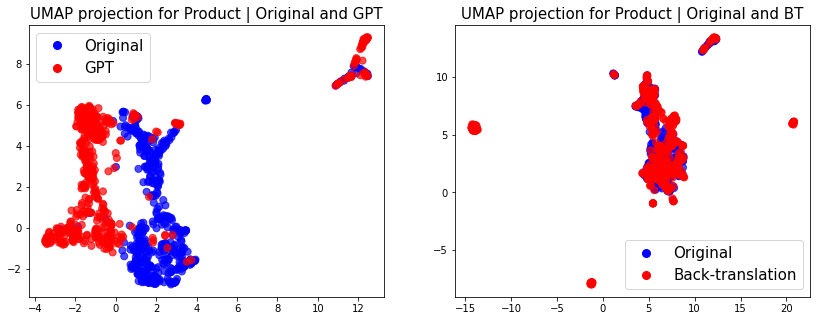

In [21]:
# original_sentences = data['committee']['original'][:LIMIT]
# google_sentences = data['committee']['google'][:LIMIT]
# gpt_sentences = data['committee']['gpt'][:LIMIT]

original_sentences = data['product']['original'][:LIMIT]
google_sentences = data['product']['google'][:LIMIT]
gpt_sentences = data['product']['gpt'][:LIMIT]


# original_sentences = data['academic']['original'][:LIMIT]
# google_sentences = data['academic']['google'][:LIMIT]
# gpt_sentences = data['academic']['gpt'][:LIMIT]

import umap
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))



sentences = original_sentences + gpt_sentences
labels = ['Original'] * len(original_sentences) + ['GPT'] * len(google_sentences)
original_indices = [None] * len(original_sentences) + list(range(len(original_sentences)))
vectors = encode_sentences(sentences)
embedding = umap.UMAP().fit_transform(vectors)

scatter_GPT = ax1.scatter(
    embedding[:, 0], embedding[:, 1], 
    c=[('blue' if label=='Original' else 'red') for label in labels],
    s=[(50 if label=='Original' else 50) for label in labels],
    alpha=0.7
)

# Add legend
original_patch = ax1.plot([],[], marker="o", ms=8, ls="", mec=None, color='blue', label="Original")[0]
gpt_patch = ax1.plot([],[], marker="o", ms=8, ls="", mec=None, color='red', label="GPT")[0]
ax1.legend(handles=[original_patch, gpt_patch], fontsize=FONTSIZE)
ax1.set_title("UMAP projection for Product | Original and GPT", fontsize=FONTSIZE)



# --------------------------- BT -------------------------
# --------------------------- BT -------------------------
# --------------------------- BT -------------------------

sentences = original_sentences + google_sentences
labels = ['Original'] * len(original_sentences) + ['Back-translation'] * len(google_sentences)
original_indices = [None] * len(original_sentences) + list(range(len(original_sentences)))
vectors = encode_sentences(sentences)
embedding = umap.UMAP().fit_transform(vectors)

scatter_BT = ax2.scatter(
    embedding[:, 0], embedding[:, 1], 
    c=[('blue' if label=='Original' else 'red') for label in labels],
    s=[(50 if label=='Original' else 50) for label in labels],
    alpha=0.7
)


# Add legend
original_patch = ax2.plot([],[], marker="o", ms=8, ls="", mec=None, color='blue', label="Original")[0]
gpt_patch = ax2.plot([],[], marker="o", ms=8, ls="", mec=None, color='red', label="Back-translation")[0]
ax2.legend(handles=[original_patch, gpt_patch], fontsize=FONTSIZE)
ax2.set_title("UMAP projection for Product | Original and BT", fontsize=FONTSIZE)

plt.savefig('umap-product.png', dpi=300, bbox_inches='tight')

#plt.show()

### Code to find the most extreme points (it's wrong)

In [22]:
# from sklearn.metrics.pairwise import euclidean_distances

# # Calculate the Euclidean distance between each pair of points in the embedding
# distances = euclidean_distances(embedding)

# # Find the 10 points that have the highest distance from all other points
# max_distances_indices = np.argsort(distances.sum(axis=1))[10:]

# print(max_distances_indices)
# print(sentences[48])

# print("\n")
# print(sentences[148])


# # Get the corresponding original and augmented sentences for these points
# max_distances_sentences = [sentences[original_indices[i]] for i in max_distances_indices]

# # Plot the original and augmented sentences side by side for comparison
# for i in range(len(max_distances_sentences)):
#     print(f"Original: {max_distances_sentences[i]}")
#     print(f"Augmented: {sentences[i+len(original_sentences)]}\n")

# Word clouds

1763


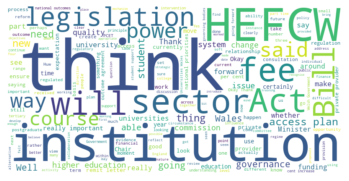

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# convert list of sentences to single string
sentences = original_sentences
text = ' '.join(sentences)

print(len(set(text.split())))

# create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()